<a href="https://colab.research.google.com/github/jrami12/codepath-prework/blob/main/JanetRamirezLab6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IS 4487 Lab 6

## Outline

Repeat exercises from Lab 5, but with the *SuperStore Retail Orders* dataset


<a href="https://colab.research.google.com/github/Stan-Pugsley/is_4487_base/blob/main/Labs/Scripts/lab6_retailer_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Load Libraries

➡️ Assignment Tasks
- Load any necessary libraries

In [ ]:
import pandas as pd
import matplotlib as mpl
import sklearn as sl
import seaborn as sns
import matplotlib.pyplot as plt

## Import Data into Dataframe

➡️ Assignment Tasks
- Import data from the SuperStore retail dataset into a dataframe (in GitHub go to Labs > DataSets)
- Describe or profile the dataframe

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

df = pd.read_csv (r'/content/gdrive/MyDrive/Colab Notebooks/superstore_retail_orders-3.csv')

Mounted at /content/gdrive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Prepare Data

➡️ Assignment Tasks
- Convert any numbers, such as Total_Amount into a number (not a string)
- Remove rows with empty (NULL) values

In [ ]:
df.dropna()

,order_id,order_date,order_year_month,customer_name,city,state_province,quantity,product_name,product_line,product_price
0,51188,2021-07-01,2021-07,Audrey Blanco,North Cherylmouth,NEW HAMPSHIRE,3.0,"Apple iPhone XR (Yellow, 256 GB) (Includes Ear...",Mobile,649.99
1,51187,2021-07-01,2021-07,Isaac Allen,Traceyland,WEST VIRGINIA,4.0,"Apple iPhone XR (Yellow, 256 GB) (Includes Ear...",Mobile,649.99
2,51199,2021-07-02,2021-07,Ian Morgan,Dylanberg,SOUTH DAKOTA,5.0,"Apple iPhone XR (Yellow, 256 GB) (Includes Ear...",Mobile,649.99
3,51241,2021-07-04,2021-07,Alexa Bell,Lake Tracytown,WISCONSIN,1.0,"Apple iPhone XR (Yellow, 256 GB) (Includes Ear...",Mobile,649.99
4,51297,2021-07-08,2021-07,Casey Diaz,Byrdchester,MISSISSIPPI,1.0,"Apple iPhone XR (Yellow, 256 GB) (Includes Ear...",Mobile,649.99
...,...,...,...,...,...,...,...,...,...,...
56040,74084,2022-06-29,2022-06,Ian Rogers,Port Mark,ALABAMA,1.0,"Samsung Galaxy S20 FE 5G (Cloud Navy, 8GB RAM,...",Electronics,914.62
56041,74062,2022-06-29,2022-06,Marcus Anderson,West Aprilfurt,NEBRASKA,1.0,"Samsung Galaxy S20 FE 5G (Cloud Navy, 8GB RAM,...",Electronics,914.62
56042,74065,2022-06-29,2022-06,Nathaniel Howard,New Lindaview,ILLINOIS,1.0,"Samsung Galaxy S20 FE 5G (Cloud Navy, 8GB RAM,...",Electronics,914.62
56043,74038,2022-06-29,2022-06,Robin Sanz,West Frankhaven,ARKANSAS,1.0,"Samsung Galaxy S20 FE 5G (Cloud Navy, 8GB RAM,...",Electronics,914.62


## Create Basic Charts

➡️ Assignment Tasks
Your target variable is Total Sales (count of sales)
- Create a bar chart
- Create a histogram
- Create a box plot
- Create a scatter plot
Each visualization should bring some insight into the total sales.

In [ ]:
Total_sales = df['total_sales'] = df['product_price'] * df['quantity']

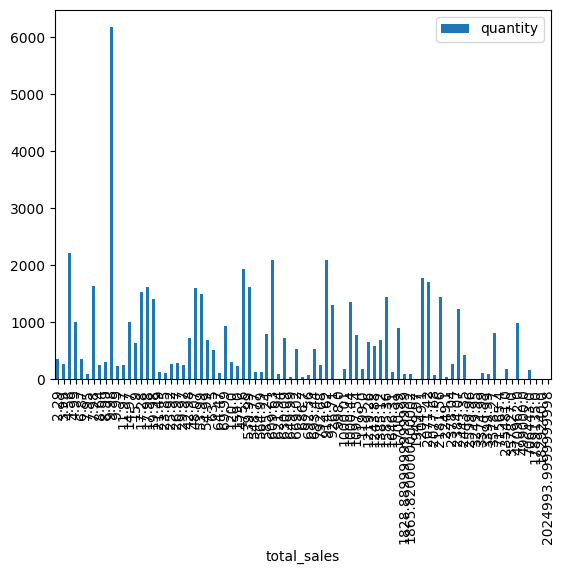

In [ ]:
#bar chart
df_clean =df[['total_sales','quantity']].groupby('total_sales').count().plot.bar()

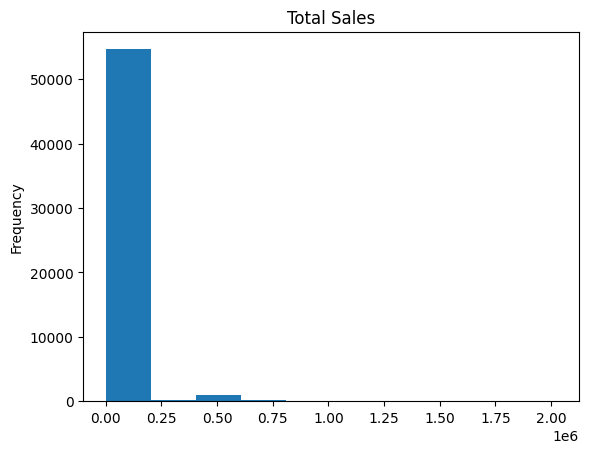

In [ ]:
#histogram

hist = df['total_sales'].plot.hist(bins=10,title='Total Sales')

<Axes: title={'center': 'quantity'}, xlabel='[product_price]'>

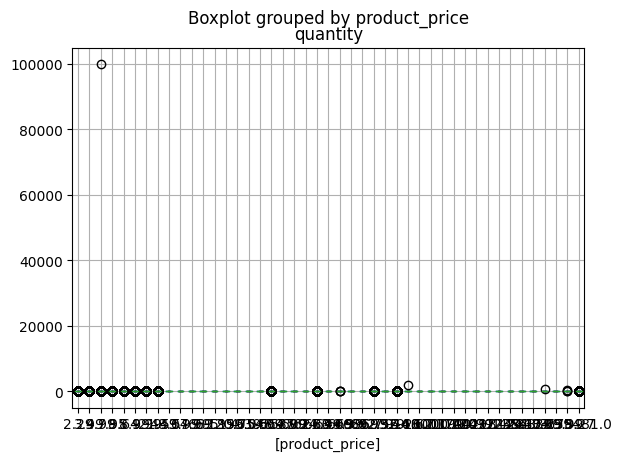

In [ ]:
#box plot
df[['quantity','product_price']].boxplot(by='product_price')

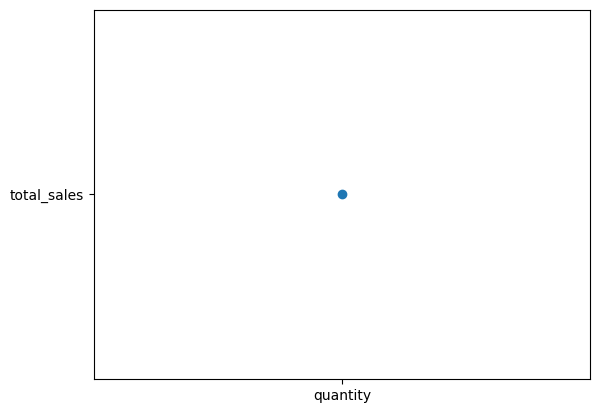

In [ ]:
#scatter plot
plt.scatter('quantity', 'total_sales')

## Explore Relationships

➡️ Assignment Tasks
Your target variable is Total Sales (count of sales)
- How does the month of year affect sales?
- What are the best states for sales?
- What are the best and worst products for sales?

In [ ]:
#month of year
result = df.groupby('order_year_month')['total_sales'].sum().reset_index()
print(result)

   order_year_month  total_sales
0           1922-06    979559.95
1           2020-01   4745149.93
2           2020-02    530915.09
3           2020-03    710043.07
4           2020-04    651707.84
5           2020-05    657669.70
6           2020-06    668056.44
7           2020-07    484113.64
8           2020-08    534106.43
9           2020-09    341233.48
10          2020-10    401585.26
11          2020-11    323436.76
12          2020-12    559483.05
13          2021-01    429458.43
14          2021-02    470781.45
15          2021-03    468580.53
16          2021-04    488745.56
17          2021-05    540842.34
18          2021-06    529408.57
19          2021-07  10495978.77
20          2021-08  47239239.96
21          2021-09  50625473.56
22          2021-10  53123132.48
23          2021-11  50213508.07
24          2021-12  60364261.25
25          2022-01  58216747.14
26          2022-02  58175468.30
27          2022-03  57460161.50
28          2022-04  63217187.94
29        

In [ ]:
#sales by state
result = df.groupby(['order_year_month', 'state_province'])['total_sales'].sum().reset_index()
print(result)

     order_year_month             state_province  total_sales
0             1922-06  ALASKA                            9.98
1             1922-06  CALIFORNIA                     2141.86
2             1922-06  HAWAII                         2993.70
3             1922-06  ILLINOIS                       2173.47
4             1922-06  KENTUCKY                         17.98
...               ...                        ...          ...
1611          2421-09  NEW MEXICO                     1754.98
1612          2421-09  NEW YORK                       1227.24
1613          2421-09  RHODE ISLAND                   1602.64
1614          2421-09  SOUTH CAROLINA                 1828.89
1615          2421-09  WYOMING                        1112.10

[1616 rows x 3 columns]


In [ ]:
#sales by product
result = df.groupby(['order_year_month', 'product_name'])['total_sales'].sum().reset_index()
print(result)

     order_year_month                                       product_name  \
0             1922-06        APPLE iPhone 11 Pro Max (Space Grey, 64 GB)   
1             1922-06  Acer 139 cm (55 inches) H Series 4K Ultra HD A...   
2             1922-06                              Bike Wash - Dissolver   
3             1922-06                    Classmate Pulse Spiral Notebook   
4             1922-06   E-COSMOS 5V 1.2W Portable Flexible USB LED Light   
...               ...                                                ...   
1838          2421-09  Samsung Galaxy S20 FE 5G (Cloud Navy, 8GB RAM,...   
1839          2421-09                     Short-Sleeve Classic Jersey, L   
1840          2421-09                                  Touring Tire Tube   
1841          2421-09  VU 138 cm (55 inches) Premium Series 4K Ultra ...   
1842          2421-09                              Water Bottle - 30 oz.   

      total_sales  
0         1000.44  
1         1828.89  
2            7.95  
3      

## Pair Plot

➡️ Assignment Tasks
- Create a pair plot showing any relevant variables, with the color determined by total sales

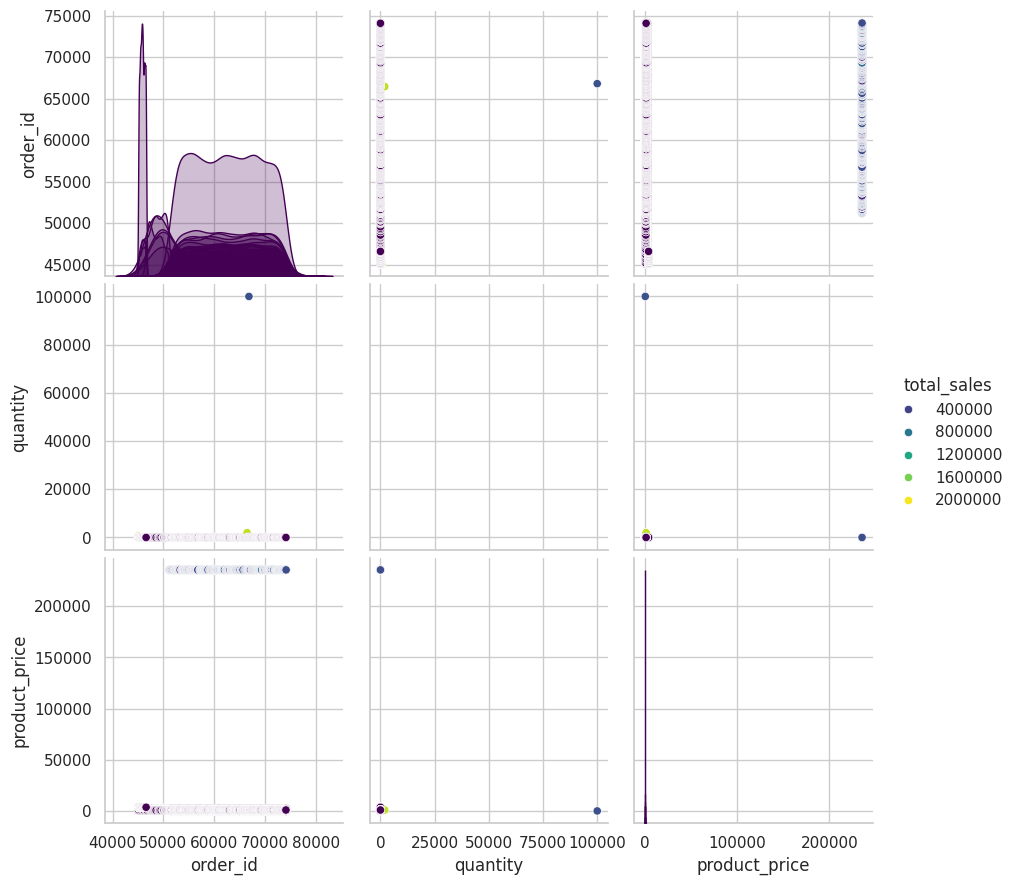

In [ ]:
#pair plot
sns.set(style="whitegrid")
sns.pairplot(df, hue='total_sales', palette='viridis', diag_kind='kde', height=3)
plt.show()